In [7]:
import numpy as np
from scipy.optimize import fsolve, minimize
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
l_bounds = []
u_bounds = []

# define function and corresponding derivative
def f(k, n):
    return k**2/2 + n**2/(2*k) - k/2 - n/2

def df(k, n):
    return k - n**2/(2*k**2) - 1/2

# define epsilon
def epsilon(n):
    return n

# iterate over positive integer values of n
for n in range(1000, 10_000_000, 1000):
    # approximating the minimum
    min_point = minimize(lambda k: f(k, n), x0=n**(2/3)).x[0] # initial guess is n^(2/3)

    # define the bound equation
    bound_eq = lambda k: f(k, n) - (f(min_point, n) + epsilon(n))

    # solve for interval bounds
    left_bound = fsolve(bound_eq, x0=min_point - 0.1*min_point)[0]
    l_bounds.append(left_bound)
    right_bound = fsolve(bound_eq, x0=min_point + 0.1*min_point)[0]
    u_bounds.append(right_bound)

    #interval_size = right_bound - left_bound
    #print(f"n={n}, interval is approximately [{round(left_bound, 4)}, {round(right_bound, 4)}] with size approximately {round(interval_size, 2)} for minimum k = {round(min_point, 2)}")

Lower bound R^2: 1.0000, MSE: 104.6595
Upper bound R^2: 1.0000, MSE: 126.3384


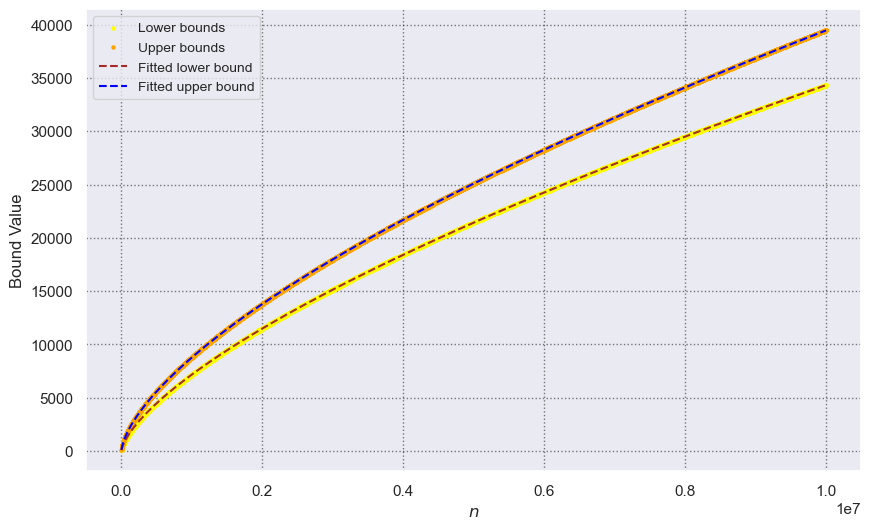

In [9]:
sns.set(style='darkgrid')

n_values = np.arange(1000, 10_000_000, 1000) 
lower_bounds = l_bounds
upper_bounds = u_bounds

# define generic power model
def simple_power_func(n, a, m):
    return a * n ** m

# perform curve fitting
popt_lower, _ = curve_fit(simple_power_func, n_values, lower_bounds)
popt_upper, _ = curve_fit(simple_power_func, n_values, upper_bounds)

# predicted values
lower_predicted = simple_power_func(n_values, *popt_lower)
upper_predicted = simple_power_func(n_values, *popt_upper)

# R^2 score
r2_lower = r2_score(lower_bounds, lower_predicted)
r2_upper = r2_score(upper_bounds, upper_predicted)

# Mean Squared Errors
mse_lower = mean_squared_error(lower_bounds, lower_predicted)
mse_upper = mean_squared_error(upper_bounds, upper_predicted)

# Print the metrics
print("Lower bound R^2: {:.4f}, MSE: {:.4f}".format(r2_lower, mse_lower))
print("Upper bound R^2: {:.4f}, MSE: {:.4f}".format(r2_upper, mse_upper))

# plot fitted curves, and the predicted points
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(n_values, lower_bounds, s=20, marker='.', color='yellow', label='Lower bounds')
ax.scatter(n_values, upper_bounds, s=20, marker='.', color='orange', label='Upper bounds')
ax.plot(n_values, lower_predicted, '--', linewidth=1.5, color='brown', label='Fitted lower bound')
ax.plot(n_values, upper_predicted, '--', linewidth=1.5, color='blue', label='Fitted upper bound')

ax.set_xlabel('$n$', fontsize=12)
ax.set_ylabel('Bound Value', fontsize=12)
ax.legend(fontsize=10)
plt.grid(True, linestyle='dotted', alpha=0.5, color='black') # important for maintaining style

#plt.tight_layout()
#plt.savefig('fitted_bounds_plot.png', dpi=300, facecolor='white')  # Save the plot with higher resolution

plt.show()

In [12]:
# lower bound coefficients
popt_lower

array([0.59152719, 0.68053571])

In [13]:
# upper bound coefficients
popt_upper

array([1.05171082, 0.6534756 ])